# Adding Layers to the NN

Ref Paper : https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf     
Ref Notebook : https://github.com/karpathy/nn-zero-to-hero/blob/master/lectures/makemore/makemore_part2_mlp.ipynb


In [309]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [310]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [311]:
len(words)

32033

In [312]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [313]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:5]:
  
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
... ---> a
..a ---> v
.av ---> a
ava ---> .
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [314]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [315]:
C = torch.randn((27,2))  # 27 chars in a 2d space

In [316]:
print(C[5])
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-0.7919,  1.8644])


tensor([-0.7919,  1.8644])

In [317]:
X[13,1]

tensor(0)

In [318]:
print(C[X[13,1]])
C[0]

tensor([-0.7216, -0.3531])


tensor([-0.7216, -0.3531])

In [319]:
emb = C[X]  # creating embeddings
emb.shape

torch.Size([32, 3, 2])

In [320]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [321]:
# adjusting shape 
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [322]:
h = emb.view(-1, 6) @ W1 + b1  # using view since it is computationally efficient
h.shape

torch.Size([32, 100])

In [323]:
h

tensor([[-1.2798, -1.5979, -0.1103,  ..., -4.1669,  0.7062, -0.8423],
        [ 4.0016, -1.4160, -3.4617,  ..., -2.0814,  1.2374, -1.6548],
        [-3.5041, -2.7999, -1.3570,  ..., -7.1071, -0.6213, -1.5718],
        ...,
        [ 2.8067, -1.3523,  0.4762,  ..., -0.1809, -0.7383, -2.1114],
        [ 0.4733,  0.1376, -1.4643,  ..., -1.7114, -0.5747, -1.7289],
        [-2.6487,  0.8282,  3.1333,  ..., -1.3069,  0.5529,  1.7674]])

In [324]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [325]:
logits = h @ W2 + b2
logits

tensor([[-1.2273e+01, -2.4379e+01,  1.4189e+01,  1.0376e+01,  1.6020e+01,
         -7.1806e+00,  2.5619e+00,  1.0932e+01,  1.5026e+01,  9.2957e+00,
          1.1429e+00, -4.0797e+01,  1.2766e+00,  6.2147e+00,  8.6650e+00,
          2.2356e+01, -2.1226e+00, -1.5477e+00, -2.0353e+01, -7.3595e+00,
         -1.1291e+01, -2.1818e+00, -2.9229e+01,  1.3310e+01,  8.3234e+00,
         -1.5094e+00,  6.1412e+00],
        [-1.5664e+01, -6.1870e+00,  3.0437e+01,  1.6235e+00,  3.5998e+01,
          1.6249e+01,  1.5579e+01, -6.2884e+00,  1.4070e+01,  3.7550e+01,
          3.3714e-01, -3.7029e+01,  1.7157e+01,  1.1991e+01,  4.4583e+00,
         -3.9947e+00, -2.5317e+01,  1.6899e+01,  2.8875e+01,  1.6872e+00,
         -2.0689e+01, -1.9769e+01,  1.0808e+01,  1.3086e+01,  1.8901e+01,
          1.0434e+01,  1.9255e+01],
        [-4.4494e+01, -1.1810e+01, -2.2965e+01, -2.1461e+01, -2.0974e+01,
         -4.5086e+01, -1.1723e+01,  1.1009e+01,  2.8983e+01, -2.2265e-01,
          7.5749e+00, -5.4222e+01,  4.90

In [326]:
logits.shape

torch.Size([32, 27])

In [327]:
counts = logits.exp()

In [328]:
prob = counts / counts.sum(1, keepdims=True)

In [329]:
prob.shape

torch.Size([32, 27])

In [330]:
prob[torch.arange(32), Y]

tensor([1.4828e-13, 6.5458e-12, 1.7938e-17, 5.5510e-33, 9.1643e-24, 9.9716e-01,
        9.0255e-19, 0.0000e+00, 0.0000e+00, 2.8883e-21, 1.5259e-18, 1.3532e-20,
        5.0343e-21, 1.4220e-25, 1.8006e-18, 3.3009e-29, 2.1215e-06, 1.0964e-15,
        9.9488e-23, 1.2073e-13, 1.1568e-16, 8.6096e-33, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.2398e-13, 9.9645e-01, 1.6784e-07, 2.2534e-13, 2.3830e-16,
        1.3096e-06, 1.5375e-19])

### compiling and generalizing

In [331]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [332]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [333]:
for p in parameters:
  p.requires_grad = True

In [334]:
for _ in range(100):
  # forward pass
  emb = C[X] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y)
  #print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  for p in parameters:
    p.data += -0.1 * p.grad

print(loss.item())

0.3367388844490051


### training on full dataset

In [335]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
  
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [336]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [359]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [360]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [361]:
for p in parameters:
  p.requires_grad = True

In [362]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [363]:
# lri = []
# lossi = []

for _ in range(10000):
  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))     # sample for batching
    
  # forward pass
  emb = C[X[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Y[ix])
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  # lr = lrs[i]
  lr = 0.1
  for p in parameters:
    p.data += -lr * p.grad
    
  # track stats
  # lri.append(lre[i])
  # lossi.append(loss.item())

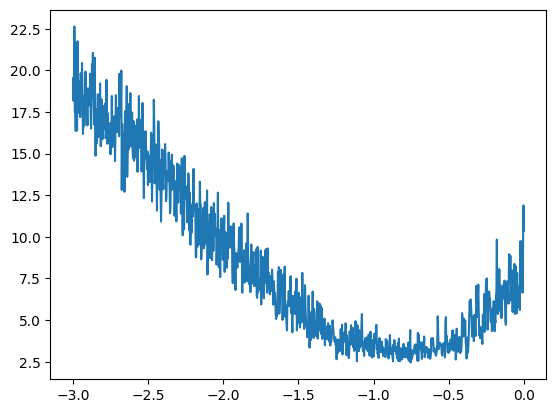

In [355]:
plt.plot(lri, lossi)    # to determine optimum lr

In [364]:
# overall loss
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.5100, grad_fn=<NllLossBackward0>)

### training split, dev/validation split, test split
#### 80%, 10%, 10%

In [366]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [412]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g) # making a 10 dim embedding
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [413]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [414]:
for p in parameters:
  p.requires_grad = True

In [415]:
lossi = []
stepi = []

In [420]:
for i in range(50000):
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))     # sample for batching
    
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # tracking stats
  stepi.append(i)
  lossi.append(loss.log10().item())

print(loss.item())

2.157487154006958


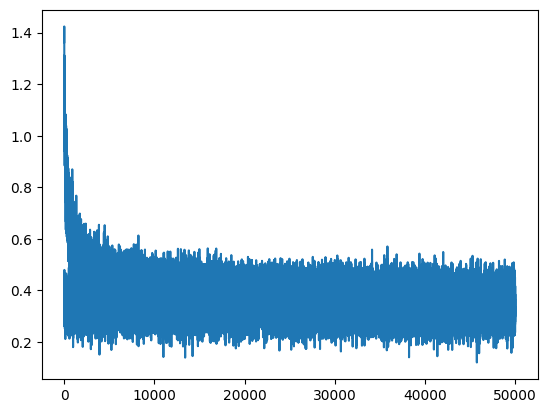

In [421]:
plt.plot(stepi, lossi)

In [422]:
# overall loss on tr
emb = C[Xtr] # (32, 3, 10)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1658, grad_fn=<NllLossBackward0>)

In [423]:
# overall loss on dev
emb = C[Xdev] # (32, 3, 10)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1976, grad_fn=<NllLossBackward0>)

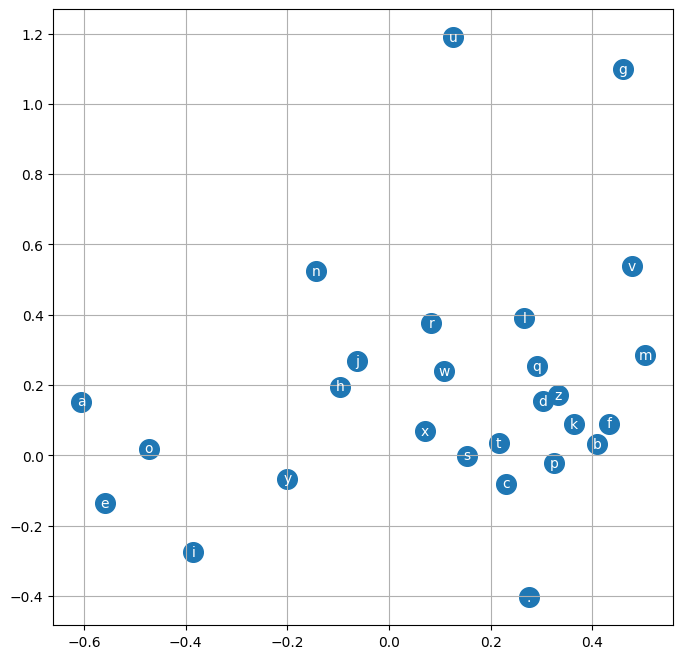

In [411]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [424]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

mora.
kayah.
see.
mad.
ryla.
rethre.
endraeg.
azeredieliigh.
poren.
eden.
sananar.
kayzion.
kalin.
shrenzi.
himies.
kin.
renly.
panteromius.
kace.
ryyah.
